In [1]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7040384288715826450,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17155444672458793004
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6918604064
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15498043040531081141
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17425528457132230144
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
import keras
from keras.models import Sequential, Model
from keras import layers, applications, optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
print(os.listdir("./input"))

['sampleSubmission.csv', 'test1', 'train']


In [5]:
epoch = 3
batch_size = 5
image_size = 224

In [6]:
#load data

filenames = os.listdir("./input/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

filename category
0     cat.0.jpg      cat
1     cat.1.jpg      cat
2    cat.10.jpg      cat
3   cat.100.jpg      cat
4  cat.1000.jpg      cat

<AxesSubplot:>

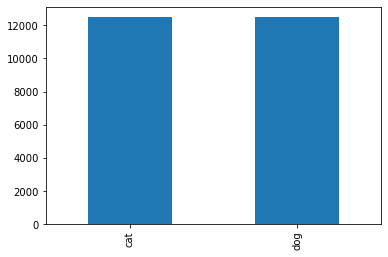

In [7]:
df['category'].value_counts().plot.bar()

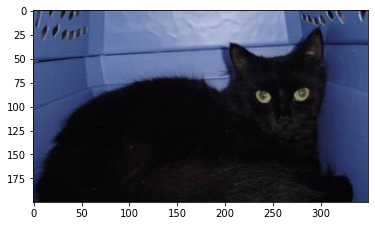

In [8]:
# see sample image

sample = random.choice(filenames)
image = load_img("./input/train/train/"+sample)
plt.imshow(image)

In [9]:
def build_vgg_block(input_layer, num_cnn=3, channel=64, block_num=1):
    x = input_layer
    
    for cnn_num in range(num_cnn):
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_conv{cnn_num}')(x)

    # Max Pooling 레이어
    x = keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2,
        name=f'block{block_num}_pooling')(x)

    return x

In [10]:
def build_vgg(input_shape=(image_size,image_size,3),
              num_cnn_list=[2,2,3,3,3],
              channel_list=[64,128,256,512,512],
              num_classes=2):
    input_layer = keras.layers.Input(shape=input_shape)
    output = input_layer
    
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_vgg_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
        )
        
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc1')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc2')(output)
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    return model

In [11]:
model = build_vgg()

Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/re

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localh

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/

In [12]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.),
    metrics=['accuracy']
)

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:lo

In [13]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 112, 112, 64)      0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 56, 56, 128)      

In [14]:
# prepare train & test data

from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [15]:
# training generator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./input/train/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 22500 validated image filenames belonging to 2 classes.


In [16]:
# validation generator

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./input/train/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2500 validated image filenames belonging to 2 classes.


In [17]:
history = model.fit(
    train_generator,
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    verbose=1
)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op

  65/4500 [..............................] - ETA: 4:38 - loss: 0.7796 - accuracy: 0.5385Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 109/4500 [..............................] - ETA: 4:39 - loss: 0.7532 - accuracy: 0.5193Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 153/4500 [>.............................] - ETA: 4:37 - loss: 0.7395 - accuracy: 0.5033Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 197/4500 [>.............................] - ETA: 4:35 - loss: 0.7294 - accuracy: 0.5137Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 241/4500 [>.............................] - ETA: 4:32 - loss: 0.7226 - accuracy: 0.5170Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 285/4500 [>.............................] - ETA: 4:29 - loss: 0.7190 - accuracy: 0.5172Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 329/4500 [=>............................] - ETA: 4:26 - loss: 0.7148 - accuracy: 0.5222Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 373/4500 [=>............................] - ETA: 4:24 - loss: 0.7122 - accuracy: 0.5255Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 417/4500 [=>............................] - ETA: 4:21 - loss: 0.7102 - accuracy: 0.5228Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 461/4500 [==>...........................] - ETA: 4:18 - loss: 0.7078 - accuracy: 0.5245Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 505/4500 [==>...........................] - ETA: 4:15 - loss: 0.7065 - accuracy: 0.5232Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 549/4500 [==>...........................] - ETA: 4:13 - loss: 0.7059 - accuracy: 0.5242Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 593/4500 [==>...........................] - ETA: 4:10 - loss: 0.7048 - accuracy: 0.5255Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 637/4500 [===>..........................] - ETA: 4:07 - loss: 0.7050 - accuracy: 0.5231Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 681/4500 [===>..........................] - ETA: 4:04 - loss: 0.7028 - accuracy: 0.5269Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 725/4500 [===>..........................] - ETA: 4:02 - loss: 0.7023 - accuracy: 0.5272Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 769/4500 [====>.........................] - ETA: 3:59 - loss: 0.7001 - accuracy: 0.5300Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 813/4500 [====>.........................] - ETA: 3:56 - loss: 0.6993 - accuracy: 0.5331Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 857/4500 [====>.........................] - ETA: 3:53 - loss: 0.6980 - accuracy: 0.5335Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 901/4500 [=====>........................] - ETA: 3:50 - loss: 0.6955 - accuracy: 0.5376Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 945/4500 [=====>........................] - ETA: 3:48 - loss: 0.6957 - accuracy: 0.5386Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 989/4500 [=====>........................] - ETA: 3:45 - loss: 0.6955 - accuracy: 0.5397Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1033/4500 [=====>........................] - ETA: 3:42 - loss: 0.6941 - accuracy: 0.5408Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1077/4500 [======>.......................] - ETA: 3:39 - loss: 0.6930 - accuracy: 0.5428Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1121/4500 [======>.......................] - ETA: 3:36 - loss: 0.6921 - accuracy: 0.5434Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1165/4500 [======>.......................] - ETA: 3:34 - loss: 0.6905 - accuracy: 0.5458Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1209/4500 [=======>......................] - ETA: 3:31 - loss: 0.6906 - accuracy: 0.5471Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1253/4500 [=======>......................] - ETA: 3:28 - loss: 0.6902 - accuracy: 0.5489Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1297/4500 [=======>......................] - ETA: 3:25 - loss: 0.6892 - accuracy: 0.5514Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1341/4500 [=======>......................] - ETA: 3:22 - loss: 0.6893 - accuracy: 0.5523Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1385/4500 [========>.....................] - ETA: 3:20 - loss: 0.6894 - accuracy: 0.5541Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1429/4500 [========>.....................] - ETA: 3:17 - loss: 0.6903 - accuracy: 0.5538Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1473/4500 [========>.....................] - ETA: 3:14 - loss: 0.6897 - accuracy: 0.5557Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1517/4500 [=========>....................] - ETA: 3:11 - loss: 0.6903 - accuracy: 0.5560Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1561/4500 [=========>....................] - ETA: 3:08 - loss: 0.6890 - accuracy: 0.5580Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1605/4500 [=========>....................] - ETA: 3:06 - loss: 0.6885 - accuracy: 0.5598Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1649/4500 [=========>....................] - ETA: 3:03 - loss: 0.6879 - accuracy: 0.5622Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1693/4500 [==========>...................] - ETA: 3:00 - loss: 0.6876 - accuracy: 0.5629Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1737/4500 [==========>...................] - ETA: 2:57 - loss: 0.6869 - accuracy: 0.5655Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1781/4500 [==========>...................] - ETA: 2:54 - loss: 0.6862 - accuracy: 0.5666Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1825/4500 [===========>..................] - ETA: 2:51 - loss: 0.6849 - accuracy: 0.5685Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1869/4500 [===========>..................] - ETA: 2:49 - loss: 0.6863 - accuracy: 0.5686Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1913/4500 [===========>..................] - ETA: 2:46 - loss: 0.6855 - accuracy: 0.5694Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1957/4500 [============>.................] - ETA: 2:43 - loss: 0.6856 - accuracy: 0.5694Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2001/4500 [============>.................] - ETA: 2:40 - loss: 0.6863 - accuracy: 0.5700Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2045/4500 [============>.................] - ETA: 2:37 - loss: 0.6856 - accuracy: 0.5704Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2089/4500 [============>.................] - ETA: 2:35 - loss: 0.6850 - accuracy: 0.5710Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2133/4500 [=============>................] - ETA: 2:32 - loss: 0.6842 - accuracy: 0.5723Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2177/4500 [=============>................] - ETA: 2:29 - loss: 0.6838 - accuracy: 0.5740Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2221/4500 [=============>................] - ETA: 2:26 - loss: 0.6829 - accuracy: 0.5763Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2265/4500 [==============>...............] - ETA: 2:23 - loss: 0.6823 - accuracy: 0.5777Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2309/4500 [==============>...............] - ETA: 2:20 - loss: 0.6826 - accuracy: 0.5790Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2353/4500 [==============>...............] - ETA: 2:18 - loss: 0.6813 - accuracy: 0.5805Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2397/4500 [==============>...............] - ETA: 2:15 - loss: 0.6803 - accuracy: 0.5824Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2441/4500 [===============>..............] - ETA: 2:12 - loss: 0.6800 - accuracy: 0.5839Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2485/4500 [===============>..............] - ETA: 2:09 - loss: 0.6799 - accuracy: 0.5854Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2529/4500 [===============>..............] - ETA: 2:06 - loss: 0.6788 - accuracy: 0.5864Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2573/4500 [================>.............] - ETA: 2:04 - loss: 0.6799 - accuracy: 0.5867Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2617/4500 [================>.............] - ETA: 2:01 - loss: 0.6789 - accuracy: 0.5878Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2661/4500 [================>.............] - ETA: 1:58 - loss: 0.6789 - accuracy: 0.5887Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2705/4500 [=================>............] - ETA: 1:55 - loss: 0.6784 - accuracy: 0.5901Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2749/4500 [=================>............] - ETA: 1:52 - loss: 0.6778 - accuracy: 0.5910Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2793/4500 [=================>............] - ETA: 1:49 - loss: 0.6768 - accuracy: 0.5926Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2837/4500 [=================>............] - ETA: 1:47 - loss: 0.6767 - accuracy: 0.5930Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2881/4500 [==================>...........] - ETA: 1:44 - loss: 0.6767 - accuracy: 0.5935Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2925/4500 [==================>...........] - ETA: 1:41 - loss: 0.6754 - accuracy: 0.5949Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2969/4500 [==================>...........] - ETA: 1:38 - loss: 0.6749 - accuracy: 0.5962Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3013/4500 [===================>..........] - ETA: 1:35 - loss: 0.6738 - accuracy: 0.5977Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3057/4500 [===================>..........] - ETA: 1:32 - loss: 0.6740 - accuracy: 0.5989Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3101/4500 [===================>..........] - ETA: 1:30 - loss: 0.6735 - accuracy: 0.6000Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3145/4500 [===================>..........] - ETA: 1:27 - loss: 0.6731 - accuracy: 0.6006Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3189/4500 [====================>.........] - ETA: 1:24 - loss: 0.6725 - accuracy: 0.6016Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3233/4500 [====================>.........] - ETA: 1:21 - loss: 0.6722 - accuracy: 0.6023Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3277/4500 [====================>.........] - ETA: 1:18 - loss: 0.6720 - accuracy: 0.6030Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3321/4500 [=====================>........] - ETA: 1:15 - loss: 0.6719 - accuracy: 0.6038Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3365/4500 [=====================>........] - ETA: 1:13 - loss: 0.6718 - accuracy: 0.6037Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3409/4500 [=====================>........] - ETA: 1:10 - loss: 0.6710 - accuracy: 0.6050Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3453/4500 [======================>.......] - ETA: 1:07 - loss: 0.6706 - accuracy: 0.6056Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3497/4500 [======================>.......] - ETA: 1:04 - loss: 0.6702 - accuracy: 0.6059Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3541/4500 [======================>.......] - ETA: 1:01 - loss: 0.6692 - accuracy: 0.6065Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3585/4500 [======================>.......] - ETA: 58s - loss: 0.6689 - accuracy: 0.6074Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3629/4500 [=======================>......] - ETA: 56s - loss: 0.6682 - accuracy: 0.6082Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3673/4500 [=======================>......] - ETA: 53s - loss: 0.6682 - accuracy: 0.6081Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3717/4500 [=======================>......] - ETA: 50s - loss: 0.6682 - accuracy: 0.6086Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3761/4500 [========================>.....] - ETA: 47s - loss: 0.6680 - accuracy: 0.6091Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3805/4500 [========================>.....] - ETA: 44s - loss: 0.6676 - accuracy: 0.6097Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3849/4500 [========================>.....] - ETA: 41s - loss: 0.6669 - accuracy: 0.6110Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3893/4500 [========================>.....] - ETA: 39s - loss: 0.6652 - accuracy: 0.6127Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3937/4500 [=========================>....] - ETA: 36s - loss: 0.6648 - accuracy: 0.6140Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3981/4500 [=========================>....] - ETA: 33s - loss: 0.6645 - accuracy: 0.6144Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4025/4500 [=========================>....] - ETA: 30s - loss: 0.6647 - accuracy: 0.6147Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4069/4500 [==========================>...] - ETA: 27s - loss: 0.6643 - accuracy: 0.6153Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4113/4500 [==========================>...] - ETA: 24s - loss: 0.6643 - accuracy: 0.6154Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4157/4500 [==========================>...] - ETA: 22s - loss: 0.6638 - accuracy: 0.6159Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4201/4500 [===========================>..] - ETA: 19s - loss: 0.6635 - accuracy: 0.6167Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4245/4500 [===========================>..] - ETA: 16s - loss: 0.6629 - accuracy: 0.6171Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4289/4500 [===========================>..] - ETA: 13s - loss: 0.6623 - accuracy: 0.6178Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4333/4500 [===========================>..] - ETA: 10s - loss: 0.6626 - accuracy: 0.6182Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4377/4500 [============================>.] - ETA: 7s - loss: 0.6624 - accuracy: 0.6191Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4421/4500 [============================>.] - ETA: 5s - loss: 0.6623 - accuracy: 0.6197Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4465/4500 [============================>.] - ETA: 2s - loss: 0.6616 - accuracy: 0.6206Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4500/4500 [==============================] - ETA: 0s - loss: 0.6613 - accuracy: 0.6210Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executi

Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
4500/4500 [==============================] - 303s 67ms/step - loss: 0.6613 - accuracy: 0.6210 - val_loss: 0.5967 - val_accuracy: 0.7040
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU

  78/4500 [..............................] - ETA: 4:43 - loss: 0.6453 - accuracy: 0.6615Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 122/4500 [..............................] - ETA: 4:40 - loss: 0.6285 - accuracy: 0.6721Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 166/4500 [>.............................] - ETA: 4:38 - loss: 0.6322 - accuracy: 0.6614Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 210/4500 [>.............................] - ETA: 4:35 - loss: 0.6393 - accuracy: 0.6486Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 254/4500 [>.............................] - ETA: 4:33 - loss: 0.6301 - accuracy: 0.6606Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 298/4500 [>.............................] - ETA: 4:30 - loss: 0.6302 - accuracy: 0.6611Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 342/4500 [=>............................] - ETA: 4:27 - loss: 0.6252 - accuracy: 0.6673Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 386/4500 [=>............................] - ETA: 4:24 - loss: 0.6310 - accuracy: 0.6710Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 430/4500 [=>............................] - ETA: 4:21 - loss: 0.6340 - accuracy: 0.6712Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 474/4500 [==>...........................] - ETA: 4:19 - loss: 0.6298 - accuracy: 0.6734Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 518/4500 [==>...........................] - ETA: 4:16 - loss: 0.6260 - accuracy: 0.6780Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 562/4500 [==>...........................] - ETA: 4:13 - loss: 0.6304 - accuracy: 0.6751Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 606/4500 [===>..........................] - ETA: 4:10 - loss: 0.6256 - accuracy: 0.6776Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 650/4500 [===>..........................] - ETA: 4:07 - loss: 0.6195 - accuracy: 0.6818Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 694/4500 [===>..........................] - ETA: 4:05 - loss: 0.6215 - accuracy: 0.6813Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 738/4500 [===>..........................] - ETA: 4:02 - loss: 0.6185 - accuracy: 0.6843Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 782/4500 [====>.........................] - ETA: 3:59 - loss: 0.6198 - accuracy: 0.6844Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 826/4500 [====>.........................] - ETA: 3:56 - loss: 0.6227 - accuracy: 0.6831Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 870/4500 [====>.........................] - ETA: 3:53 - loss: 0.6258 - accuracy: 0.6821Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 914/4500 [=====>........................] - ETA: 3:51 - loss: 0.6271 - accuracy: 0.6825Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 958/4500 [=====>........................] - ETA: 3:48 - loss: 0.6296 - accuracy: 0.6800Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1002/4500 [=====>........................] - ETA: 3:45 - loss: 0.6273 - accuracy: 0.6820Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1046/4500 [=====>........................] - ETA: 3:42 - loss: 0.6269 - accuracy: 0.6816Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1090/4500 [======>.......................] - ETA: 3:39 - loss: 0.6284 - accuracy: 0.6806Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1134/4500 [======>.......................] - ETA: 3:36 - loss: 0.6277 - accuracy: 0.6799Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1178/4500 [======>.......................] - ETA: 3:34 - loss: 0.6269 - accuracy: 0.6803Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1222/4500 [=======>......................] - ETA: 3:31 - loss: 0.6245 - accuracy: 0.6822Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1266/4500 [=======>......................] - ETA: 3:28 - loss: 0.6223 - accuracy: 0.6833Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1310/4500 [=======>......................] - ETA: 3:25 - loss: 0.6230 - accuracy: 0.6829Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1354/4500 [========>.....................] - ETA: 3:22 - loss: 0.6251 - accuracy: 0.6820Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1398/4500 [========>.....................] - ETA: 3:19 - loss: 0.6227 - accuracy: 0.6837Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1442/4500 [========>.....................] - ETA: 3:17 - loss: 0.6214 - accuracy: 0.6835Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1486/4500 [========>.....................] - ETA: 3:14 - loss: 0.6214 - accuracy: 0.6841Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1530/4500 [=========>....................] - ETA: 3:11 - loss: 0.6227 - accuracy: 0.6831Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1574/4500 [=========>....................] - ETA: 3:08 - loss: 0.6250 - accuracy: 0.6811Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1618/4500 [=========>....................] - ETA: 3:05 - loss: 0.6263 - accuracy: 0.6806Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1662/4500 [==========>...................] - ETA: 3:02 - loss: 0.6267 - accuracy: 0.6801Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1706/4500 [==========>...................] - ETA: 3:00 - loss: 0.6251 - accuracy: 0.6811Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1750/4500 [==========>...................] - ETA: 2:57 - loss: 0.6249 - accuracy: 0.6805Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1794/4500 [==========>...................] - ETA: 2:54 - loss: 0.6252 - accuracy: 0.6806Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1838/4500 [===========>..................] - ETA: 2:51 - loss: 0.6261 - accuracy: 0.6802Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1882/4500 [===========>..................] - ETA: 2:48 - loss: 0.6257 - accuracy: 0.6795Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1926/4500 [===========>..................] - ETA: 2:45 - loss: 0.6248 - accuracy: 0.6803Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1970/4500 [============>.................] - ETA: 2:43 - loss: 0.6229 - accuracy: 0.6811Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2014/4500 [============>.................] - ETA: 2:40 - loss: 0.6232 - accuracy: 0.6802Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2058/4500 [============>.................] - ETA: 2:37 - loss: 0.6219 - accuracy: 0.6812Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2102/4500 [=============>................] - ETA: 2:34 - loss: 0.6216 - accuracy: 0.6813Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2146/4500 [=============>................] - ETA: 2:31 - loss: 0.6215 - accuracy: 0.6818Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2190/4500 [=============>................] - ETA: 2:28 - loss: 0.6201 - accuracy: 0.6820Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2234/4500 [=============>................] - ETA: 2:26 - loss: 0.6195 - accuracy: 0.6825Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2278/4500 [==============>...............] - ETA: 2:23 - loss: 0.6188 - accuracy: 0.6833Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2322/4500 [==============>...............] - ETA: 2:20 - loss: 0.6177 - accuracy: 0.6837Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2366/4500 [==============>...............] - ETA: 2:17 - loss: 0.6158 - accuracy: 0.6851Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2410/4500 [===============>..............] - ETA: 2:14 - loss: 0.6169 - accuracy: 0.6852Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2454/4500 [===============>..............] - ETA: 2:11 - loss: 0.6169 - accuracy: 0.6853Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2498/4500 [===============>..............] - ETA: 2:09 - loss: 0.6156 - accuracy: 0.6863Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2542/4500 [===============>..............] - ETA: 2:06 - loss: 0.6157 - accuracy: 0.6862Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2586/4500 [================>.............] - ETA: 2:03 - loss: 0.6147 - accuracy: 0.6873Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2630/4500 [================>.............] - ETA: 2:00 - loss: 0.6151 - accuracy: 0.6871Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2674/4500 [================>.............] - ETA: 1:57 - loss: 0.6151 - accuracy: 0.6877Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2718/4500 [=================>............] - ETA: 1:54 - loss: 0.6141 - accuracy: 0.6884Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2762/4500 [=================>............] - ETA: 1:52 - loss: 0.6130 - accuracy: 0.6891Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2806/4500 [=================>............] - ETA: 1:49 - loss: 0.6135 - accuracy: 0.6892Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2850/4500 [==================>...........] - ETA: 1:46 - loss: 0.6132 - accuracy: 0.6893Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2894/4500 [==================>...........] - ETA: 1:43 - loss: 0.6128 - accuracy: 0.6891Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2938/4500 [==================>...........] - ETA: 1:40 - loss: 0.6117 - accuracy: 0.6895Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2982/4500 [==================>...........] - ETA: 1:37 - loss: 0.6111 - accuracy: 0.6899Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3026/4500 [===================>..........] - ETA: 1:35 - loss: 0.6113 - accuracy: 0.6895Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3070/4500 [===================>..........] - ETA: 1:32 - loss: 0.6109 - accuracy: 0.6896Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3114/4500 [===================>..........] - ETA: 1:29 - loss: 0.6102 - accuracy: 0.6902Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3158/4500 [====================>.........] - ETA: 1:26 - loss: 0.6094 - accuracy: 0.6899Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3202/4500 [====================>.........] - ETA: 1:23 - loss: 0.6090 - accuracy: 0.6895Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3246/4500 [====================>.........] - ETA: 1:20 - loss: 0.6092 - accuracy: 0.6889Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3290/4500 [====================>.........] - ETA: 1:18 - loss: 0.6094 - accuracy: 0.6890Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3334/4500 [=====================>........] - ETA: 1:15 - loss: 0.6088 - accuracy: 0.6894Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3378/4500 [=====================>........] - ETA: 1:12 - loss: 0.6077 - accuracy: 0.6901Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3422/4500 [=====================>........] - ETA: 1:09 - loss: 0.6073 - accuracy: 0.6904Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3466/4500 [======================>.......] - ETA: 1:06 - loss: 0.6063 - accuracy: 0.6916Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3510/4500 [======================>.......] - ETA: 1:03 - loss: 0.6057 - accuracy: 0.6921Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3554/4500 [======================>.......] - ETA: 1:01 - loss: 0.6059 - accuracy: 0.6922Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3598/4500 [======================>.......] - ETA: 58s - loss: 0.6060 - accuracy: 0.6921Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3642/4500 [=======================>......] - ETA: 55s - loss: 0.6064 - accuracy: 0.6922Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3686/4500 [=======================>......] - ETA: 52s - loss: 0.6063 - accuracy: 0.6923Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3730/4500 [=======================>......] - ETA: 49s - loss: 0.6060 - accuracy: 0.6923Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3774/4500 [========================>.....] - ETA: 46s - loss: 0.6059 - accuracy: 0.6925Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3818/4500 [========================>.....] - ETA: 43s - loss: 0.6060 - accuracy: 0.6923Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3862/4500 [========================>.....] - ETA: 41s - loss: 0.6050 - accuracy: 0.6927Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3906/4500 [=========================>....] - ETA: 38s - loss: 0.6052 - accuracy: 0.6929Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3950/4500 [=========================>....] - ETA: 35s - loss: 0.6049 - accuracy: 0.6935Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3994/4500 [=========================>....] - ETA: 32s - loss: 0.6054 - accuracy: 0.6934Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4038/4500 [=========================>....] - ETA: 29s - loss: 0.6049 - accuracy: 0.6934Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4082/4500 [==========================>...] - ETA: 26s - loss: 0.6042 - accuracy: 0.6940Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4126/4500 [==========================>...] - ETA: 24s - loss: 0.6040 - accuracy: 0.6940Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4170/4500 [==========================>...] - ETA: 21s - loss: 0.6036 - accuracy: 0.6948Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4214/4500 [===========================>..] - ETA: 18s - loss: 0.6039 - accuracy: 0.6947Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4258/4500 [===========================>..] - ETA: 15s - loss: 0.6036 - accuracy: 0.6947Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4302/4500 [===========================>..] - ETA: 12s - loss: 0.6029 - accuracy: 0.6950Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4346/4500 [===========================>..] - ETA: 9s - loss: 0.6032 - accuracy: 0.6950Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4390/4500 [============================>.] - ETA: 7s - loss: 0.6025 - accuracy: 0.6958Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4434/4500 [============================>.] - ETA: 4s - loss: 0.6025 - accuracy: 0.6961Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4478/4500 [============================>.] - ETA: 1s - loss: 0.6016 - accuracy: 0.6968Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4500/4500 [==============================] - ETA: 0s - loss: 0.6014 - accuracy: 0.6970Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device

Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


  50/4500 [..............................] - ETA: 4:45 - loss: 0.5210 - accuracy: 0.7400Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


  94/4500 [..............................] - ETA: 4:43 - loss: 0.5563 - accuracy: 0.7383Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 138/4500 [..............................] - ETA: 4:40 - loss: 0.5797 - accuracy: 0.7275Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 182/4500 [>.............................] - ETA: 4:38 - loss: 0.5864 - accuracy: 0.7242Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 226/4500 [>.............................] - ETA: 4:35 - loss: 0.5836 - accuracy: 0.7230Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 270/4500 [>.............................] - ETA: 4:32 - loss: 0.5792 - accuracy: 0.7222Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 314/4500 [=>............................] - ETA: 4:29 - loss: 0.5734 - accuracy: 0.7287Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 358/4500 [=>............................] - ETA: 4:27 - loss: 0.5798 - accuracy: 0.7257Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 402/4500 [=>............................] - ETA: 4:24 - loss: 0.5805 - accuracy: 0.7229Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 446/4500 [=>............................] - ETA: 4:21 - loss: 0.5822 - accuracy: 0.7206Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 490/4500 [==>...........................] - ETA: 4:18 - loss: 0.5763 - accuracy: 0.7257Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 534/4500 [==>...........................] - ETA: 4:15 - loss: 0.5793 - accuracy: 0.7277Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 578/4500 [==>...........................] - ETA: 4:12 - loss: 0.5763 - accuracy: 0.7291Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 622/4500 [===>..........................] - ETA: 4:10 - loss: 0.5775 - accuracy: 0.7286Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 666/4500 [===>..........................] - ETA: 4:07 - loss: 0.5774 - accuracy: 0.7276Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 710/4500 [===>..........................] - ETA: 4:04 - loss: 0.5764 - accuracy: 0.7290Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 754/4500 [====>.........................] - ETA: 4:01 - loss: 0.5764 - accuracy: 0.7292Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 798/4500 [====>.........................] - ETA: 3:58 - loss: 0.5759 - accuracy: 0.7293Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 842/4500 [====>.........................] - ETA: 3:55 - loss: 0.5718 - accuracy: 0.7314Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 886/4500 [====>.........................] - ETA: 3:53 - loss: 0.5747 - accuracy: 0.7293Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 930/4500 [=====>........................] - ETA: 3:50 - loss: 0.5769 - accuracy: 0.7273Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


 974/4500 [=====>........................] - ETA: 3:47 - loss: 0.5745 - accuracy: 0.7285Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1018/4500 [=====>........................] - ETA: 3:44 - loss: 0.5725 - accuracy: 0.7295Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1062/4500 [======>.......................] - ETA: 3:41 - loss: 0.5708 - accuracy: 0.7299Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1106/4500 [======>.......................] - ETA: 3:38 - loss: 0.5713 - accuracy: 0.7286Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1150/4500 [======>.......................] - ETA: 3:36 - loss: 0.5744 - accuracy: 0.7287Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1194/4500 [======>.......................] - ETA: 3:33 - loss: 0.5743 - accuracy: 0.7293Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1238/4500 [=======>......................] - ETA: 3:30 - loss: 0.5724 - accuracy: 0.7310Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1282/4500 [=======>......................] - ETA: 3:27 - loss: 0.5726 - accuracy: 0.7310Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1326/4500 [=======>......................] - ETA: 3:24 - loss: 0.5717 - accuracy: 0.7323Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1370/4500 [========>.....................] - ETA: 3:21 - loss: 0.5713 - accuracy: 0.7324Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1414/4500 [========>.....................] - ETA: 3:19 - loss: 0.5692 - accuracy: 0.7330Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1458/4500 [========>.....................] - ETA: 3:16 - loss: 0.5687 - accuracy: 0.7331Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1502/4500 [=========>....................] - ETA: 3:13 - loss: 0.5655 - accuracy: 0.7350Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1546/4500 [=========>....................] - ETA: 3:10 - loss: 0.5662 - accuracy: 0.7351Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1590/4500 [=========>....................] - ETA: 3:07 - loss: 0.5649 - accuracy: 0.7357Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1634/4500 [=========>....................] - ETA: 3:04 - loss: 0.5651 - accuracy: 0.7359Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1678/4500 [==========>...................] - ETA: 3:02 - loss: 0.5645 - accuracy: 0.7359Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1722/4500 [==========>...................] - ETA: 2:59 - loss: 0.5637 - accuracy: 0.7368Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1766/4500 [==========>...................] - ETA: 2:56 - loss: 0.5600 - accuracy: 0.7386Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1810/4500 [===========>..................] - ETA: 2:53 - loss: 0.5604 - accuracy: 0.7390Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1854/4500 [===========>..................] - ETA: 2:50 - loss: 0.5586 - accuracy: 0.7398Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1898/4500 [===========>..................] - ETA: 2:47 - loss: 0.5585 - accuracy: 0.7404Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1942/4500 [===========>..................] - ETA: 2:45 - loss: 0.5578 - accuracy: 0.7408Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


1986/4500 [============>.................] - ETA: 2:42 - loss: 0.5571 - accuracy: 0.7406Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2030/4500 [============>.................] - ETA: 2:39 - loss: 0.5559 - accuracy: 0.7412Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2074/4500 [============>.................] - ETA: 2:36 - loss: 0.5575 - accuracy: 0.7408Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2118/4500 [=============>................] - ETA: 2:33 - loss: 0.5567 - accuracy: 0.7406Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2162/4500 [=============>................] - ETA: 2:30 - loss: 0.5560 - accuracy: 0.7407Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2206/4500 [=============>................] - ETA: 2:28 - loss: 0.5553 - accuracy: 0.7409Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2250/4500 [==============>...............] - ETA: 2:25 - loss: 0.5562 - accuracy: 0.7408Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2294/4500 [==============>...............] - ETA: 2:22 - loss: 0.5562 - accuracy: 0.7407Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2338/4500 [==============>...............] - ETA: 2:19 - loss: 0.5561 - accuracy: 0.7412Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2382/4500 [==============>...............] - ETA: 2:16 - loss: 0.5568 - accuracy: 0.7406Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2426/4500 [===============>..............] - ETA: 2:13 - loss: 0.5569 - accuracy: 0.7406Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2470/4500 [===============>..............] - ETA: 2:10 - loss: 0.5568 - accuracy: 0.7405Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2514/4500 [===============>..............] - ETA: 2:08 - loss: 0.5577 - accuracy: 0.7395Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2558/4500 [================>.............] - ETA: 2:05 - loss: 0.5578 - accuracy: 0.7389Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2602/4500 [================>.............] - ETA: 2:02 - loss: 0.5589 - accuracy: 0.7382Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2646/4500 [================>.............] - ETA: 1:59 - loss: 0.5574 - accuracy: 0.7385Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2690/4500 [================>.............] - ETA: 1:56 - loss: 0.5572 - accuracy: 0.7389Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2734/4500 [=================>............] - ETA: 1:53 - loss: 0.5577 - accuracy: 0.7385Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2778/4500 [=================>............] - ETA: 1:51 - loss: 0.5564 - accuracy: 0.7389Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2822/4500 [=================>............] - ETA: 1:48 - loss: 0.5572 - accuracy: 0.7392Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2866/4500 [==================>...........] - ETA: 1:45 - loss: 0.5570 - accuracy: 0.7400Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2910/4500 [==================>...........] - ETA: 1:42 - loss: 0.5565 - accuracy: 0.7404Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2954/4500 [==================>...........] - ETA: 1:39 - loss: 0.5562 - accuracy: 0.7403Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


2998/4500 [==================>...........] - ETA: 1:36 - loss: 0.5553 - accuracy: 0.7408Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3042/4500 [===================>..........] - ETA: 1:34 - loss: 0.5558 - accuracy: 0.7402Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3086/4500 [===================>..........] - ETA: 1:31 - loss: 0.5562 - accuracy: 0.7406Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3130/4500 [===================>..........] - ETA: 1:28 - loss: 0.5553 - accuracy: 0.7409Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3174/4500 [====================>.........] - ETA: 1:25 - loss: 0.5542 - accuracy: 0.7411Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3218/4500 [====================>.........] - ETA: 1:22 - loss: 0.5537 - accuracy: 0.7416Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3262/4500 [====================>.........] - ETA: 1:19 - loss: 0.5529 - accuracy: 0.7422Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3306/4500 [=====================>........] - ETA: 1:17 - loss: 0.5527 - accuracy: 0.7424Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3350/4500 [=====================>........] - ETA: 1:14 - loss: 0.5522 - accuracy: 0.7423Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3394/4500 [=====================>........] - ETA: 1:11 - loss: 0.5527 - accuracy: 0.7425Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3438/4500 [=====================>........] - ETA: 1:08 - loss: 0.5522 - accuracy: 0.7428Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3482/4500 [======================>.......] - ETA: 1:05 - loss: 0.5513 - accuracy: 0.7433Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3526/4500 [======================>.......] - ETA: 1:02 - loss: 0.5507 - accuracy: 0.7434Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3570/4500 [======================>.......] - ETA: 1:00 - loss: 0.5501 - accuracy: 0.7442Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3614/4500 [=======================>......] - ETA: 57s - loss: 0.5496 - accuracy: 0.7447Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3658/4500 [=======================>......] - ETA: 54s - loss: 0.5508 - accuracy: 0.7447Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3702/4500 [=======================>......] - ETA: 51s - loss: 0.5500 - accuracy: 0.7451Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3746/4500 [=======================>......] - ETA: 48s - loss: 0.5496 - accuracy: 0.7452Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3790/4500 [========================>.....] - ETA: 45s - loss: 0.5485 - accuracy: 0.7459Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3834/4500 [========================>.....] - ETA: 42s - loss: 0.5478 - accuracy: 0.7463Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3878/4500 [========================>.....] - ETA: 40s - loss: 0.5490 - accuracy: 0.7462Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3922/4500 [=========================>....] - ETA: 37s - loss: 0.5496 - accuracy: 0.7459Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


3966/4500 [=========================>....] - ETA: 34s - loss: 0.5485 - accuracy: 0.7464Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4010/4500 [=========================>....] - ETA: 31s - loss: 0.5484 - accuracy: 0.7465Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4054/4500 [==========================>...] - ETA: 28s - loss: 0.5476 - accuracy: 0.7471Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4098/4500 [==========================>...] - ETA: 25s - loss: 0.5475 - accuracy: 0.7473Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4142/4500 [==========================>...] - ETA: 23s - loss: 0.5474 - accuracy: 0.7473Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4186/4500 [==========================>...] - ETA: 20s - loss: 0.5474 - accuracy: 0.7470Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4230/4500 [===========================>..] - ETA: 17s - loss: 0.5476 - accuracy: 0.7470Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4274/4500 [===========================>..] - ETA: 14s - loss: 0.5468 - accuracy: 0.7475Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4318/4500 [===========================>..] - ETA: 11s - loss: 0.5471 - accuracy: 0.7478Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4362/4500 [============================>.] - ETA: 8s - loss: 0.5471 - accuracy: 0.7476Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4406/4500 [============================>.] - ETA: 6s - loss: 0.5470 - accuracy: 0.7476Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4450/4500 [============================>.] - ETA: 3s - loss: 0.5468 - accuracy: 0.7478Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4494/4500 [============================>.] - ETA: 0s - loss: 0.5468 - accuracy: 0.7478Executing op __inference_train_function_2321 in device /job:localhost/replica:0/task:0/device:GPU:0


4500/4500 [==============================] - ETA: 0s - loss: 0.5471 - accuracy: 0.7478Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device

Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


In [18]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print('test loss: %f  test acc: %f' %(accuracy, loss))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11558 in device /job:localhost/replica:0/task:0/device:GPU:0


<ipython-input-19-8426f3fe8df9>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(history.history['accuracy'])+1),len(history.history['accuracy'])/10)
<ipython-input-19-8426f3fe8df9>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(history.history['loss'])+1),len(history.history['loss'])/10)


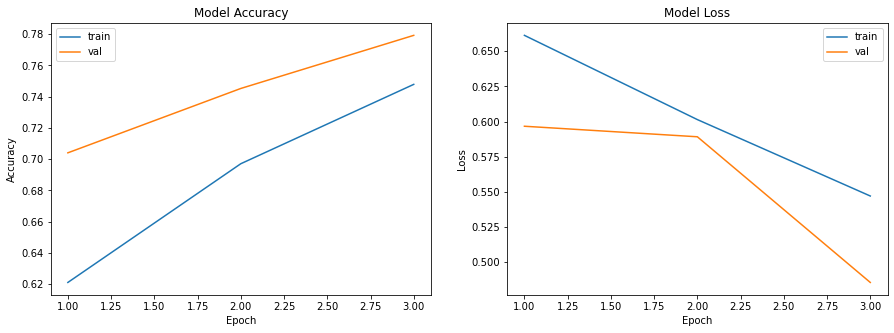

In [19]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(range(1,len(history.history['accuracy'])+1),history.history['accuracy'])
axs[0].plot(range(1,len(history.history['val_accuracy'])+1),history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_xticks(np.arange(1,len(history.history['accuracy'])+1),len(history.history['accuracy'])/10)
axs[0].legend(['train', 'val'], loc='best')
axs[1].plot(range(1,len(history.history['loss'])+1),history.history['loss'])
axs[1].plot(range(1,len(history.history['val_loss'])+1),history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_xticks(np.arange(1,len(history.history['loss'])+1),len(history.history['loss'])/10)
axs[1].legend(['train', 'val'], loc='best')
plt.show()

In [25]:
y_val = validate_df['category']
y_pred =  model.predict_generator(validation_generator)

print(y_val)
print(y_pred)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executi

Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/

Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/

Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/

Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/

Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/

Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_33826 in device /job:localhost/

In [42]:
y_true = np.where(y_val == 'dog', 1, 0)

threshold = 0.5
y_final = []
for i in y_pred:
    if(i[0] > threshold):
        y_final.append(0)
    else:
        y_final.append(1)
y_final = np.array(y_final)

print(y_val)

print(y_true)
print(y_final)

0       dog
1       cat
2       cat
3       dog
4       dog
       ... 
2495    cat
2496    cat
2497    dog
2498    dog
2499    cat
Name: category, Length: 2500, dtype: object
[1 0 0 ... 1 1 0]
[1 0 0 ... 0 0 0]


In [43]:
print(y_final.size, y_true.size)

2500 2500


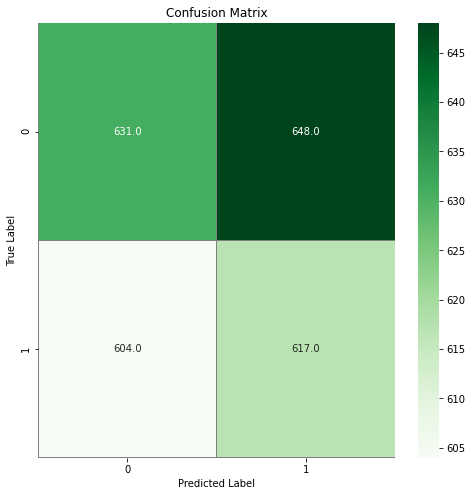

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_final)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [45]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_final, target_names=['cat','dog'])

print(report)

              precision    recall  f1-score   support

         cat       0.51      0.49      0.50      1279
         dog       0.49      0.51      0.50      1221

    accuracy                           0.50      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.50      0.50      0.50      2500



In [46]:
# prepare testing data

test_filenames = os.listdir("./input/test1/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# testing generator

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./input/test1/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 12500 validated image filenames.


In [52]:
# predict

predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executi

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_35039 in device /job:localhost/

In [55]:
print(predict, type(predict))

test_df['category'] = np.where(predict>threshold, 'dog', 'cat')

[[0.03220697 0.967793  ]
 [0.9068184  0.0931816 ]
 [0.48030484 0.5196952 ]
 ...
 [0.08097062 0.9190294 ]
 [0.9634166  0.03658342]
 [0.31622744 0.68377256]] <class 'numpy.ndarray'>


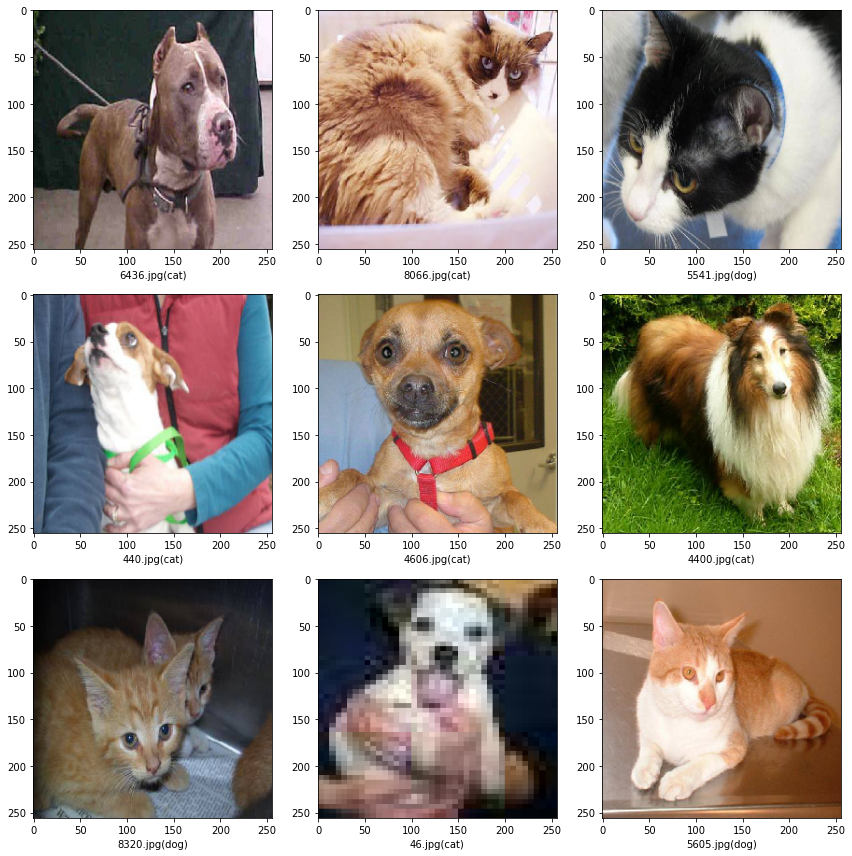

In [56]:
# see predicted result
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./input/test1/test1/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

C:\Users\pomat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '(Test data)')

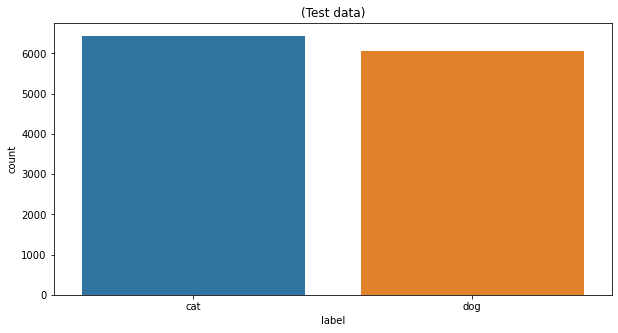

In [57]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_13010030.csv', index=False)

plt.figure(figsize=(10,5))
sns.countplot(submission_df['label'])
plt.title("(Test data)")